In [ ]:
class Image:
  import numpy as np
  def __init__(self,data:np.ndarray):
    self.data=data
    self.height=data.shape[0]
    self.width=data.shape[1]
    self.dataType=data.dtype

  def is_grayScale(self):
   return  len(self.data.shape) == 2

  def imshow(self):
    import matplotlib.pyplot as plt
    if (self.is_grayScale()):
      plt.imshow(self.data,cmap='gray')

  def histogram(self,intensity_resulation=8,normalize=False):
    import numpy as np

    if(self.is_grayScale()):
      bins=np.arange(0,2**intensity_resulation,1)
      hist=np.zeros_like(bins)
      for i in range(self.height):
        for j in range(self.width):
          hist[self.data[i,j]]+=1

      if (normalize):
        hist=hist/(self.height*self.width)
    return bins,hist

  def plot_histogram(self,intensity_resulation=8,normalize=False):
    import matplotlib.pyplot as plt
    bins,hist=self.histogram(intensity_resulation=intensity_resulation,normalize=normalize)
    plt.plot(bins,hist)

  def cumulative_histogram(self,intensity_resulation=8,normalize=False):
    bins,hist=self.histogram(intensity_resulation=intensity_resulation,normalize=normalize)

    for i in range(1,len(hist)):
      hist[i]= hist[i]+hist[i-1]

    return bins,hist

  def plot_cumulative_histogram(self,intensity_resulation=8,normalize=False):
    import matplotlib.pyplot as plt
    bins,hist=self.cumulative_histogram(intensity_resulation=intensity_resulation,normalize=normalize)
    plt.plot(bins,hist)


  def contrast_stretching(self,intensity_resulation=8,normalize=False):
    import numpy as np
    r=self.data/255
    s=(((1/(np.max(r)-np.min(r)))*(r-np.min(r)))*255).astype(np.uint8)

    return Image(s)


  def power_transform(self,gamma):
    #p=cr^gamma
    import numpy as np
    r=self.data/255
    r=r**gamma
    c=np.max(r)
    s=r/c

    return Image(s)




In [ ]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img=data.clock()
I=Image(img)

In [ ]:
I.width

400

In [ ]:
I.height

300

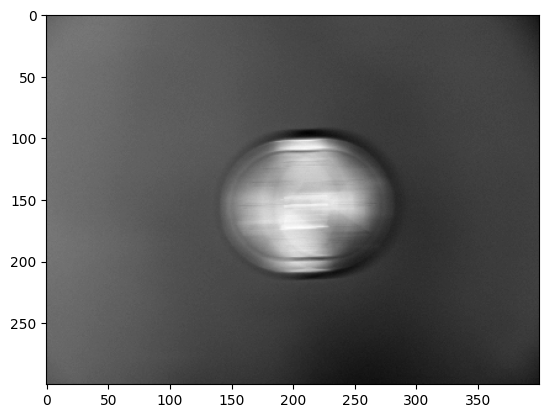

In [ ]:
I.imshow()

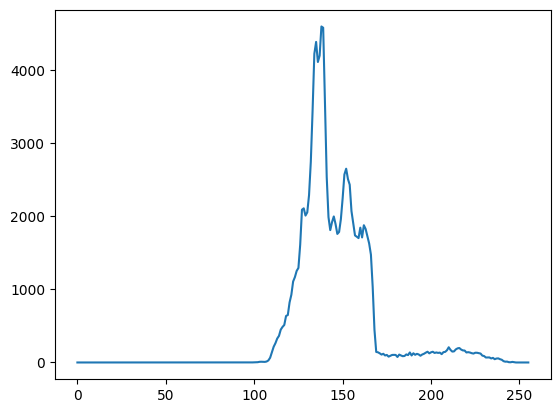

In [ ]:
I.plot_histogram(normalize=False)

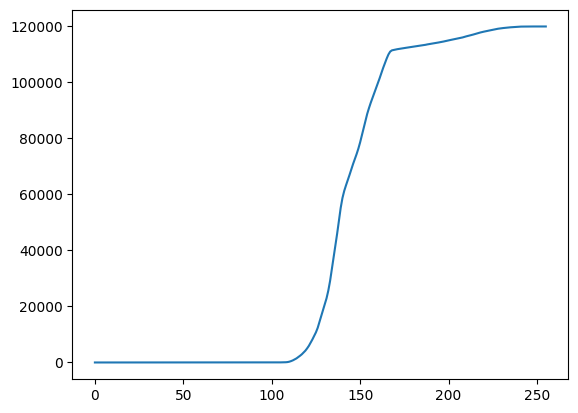

In [ ]:
I.plot_cumulative_histogram(normalize=False)

In [ ]:
con=I.contrast_stretching(normalize=False)

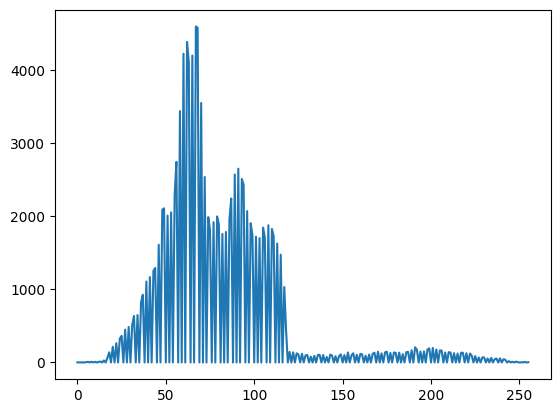

In [ ]:
con.plot_histogram()

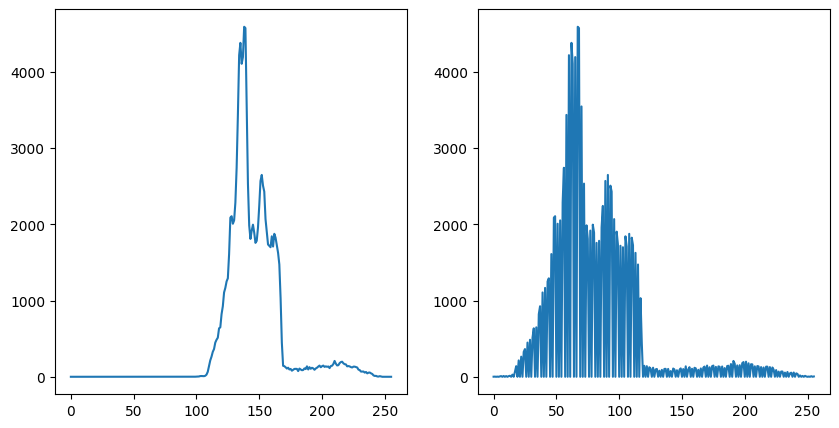

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
I.plot_histogram()

plt.subplot(1,2,2)
con.plot_histogram()

In [ ]:
pow=I.power_transform(7)

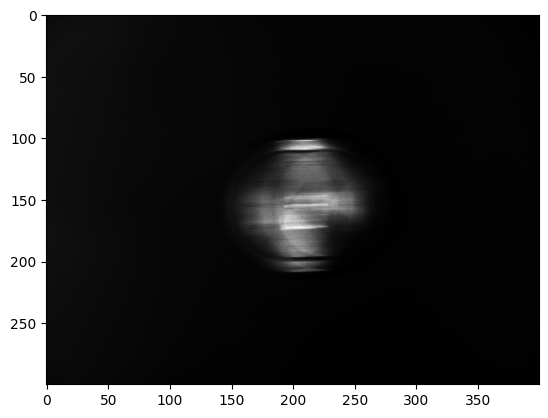

In [ ]:
pow.imshow()

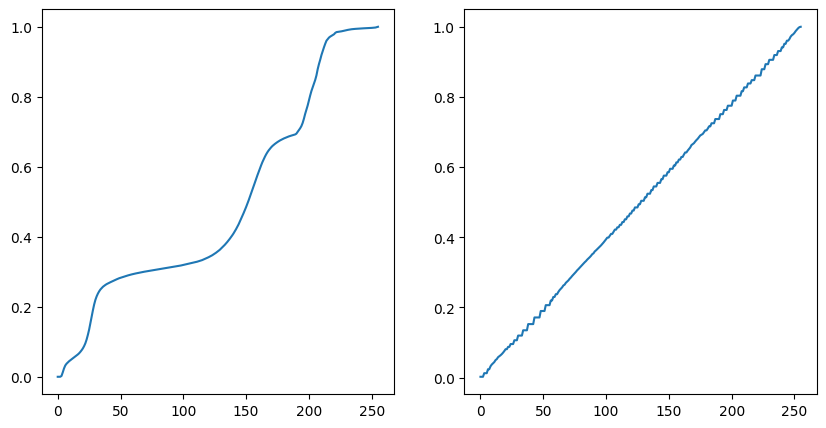

In [ ]:
from skimage import exposure
img=data.camera()
I=Image(img)
img_eq=exposure.equalize_hist(img)*255
i3=Image(img_eq.astype(np.uint8))

plt.figure(figsize=(10,5),dpi=100)

plt.subplot(1,2,1)
I.plot_cumulative_histogram(normalize=True)

plt.subplot(1,2,2)
i3.plot_cumulative_histogram(normalize=True)
plt.show()